### Soundnames: Learning from sequence of sounds

In [1]:
!pip install Metaphone

In [2]:
from metaphone import doublemetaphone
doublemetaphone("architect")

('ARKTKT', '')

In [3]:
doublemetaphone("bajador")

('PJTR', 'PHTR')

In [4]:
from __future__ import print_function

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [5]:
NGRAMS = (2, 3)
SAMPLE = 1000000
EPOCHS = 15

# Florida voter
df = pd.read_csv('/opt/data/fl_voter/fl_voter_name_gender_race.csv', usecols=['last_name', 'first_name', 'race'], nrows=SAMPLE * 1.5)
df.dropna(subset=['first_name', 'last_name'], inplace=True)

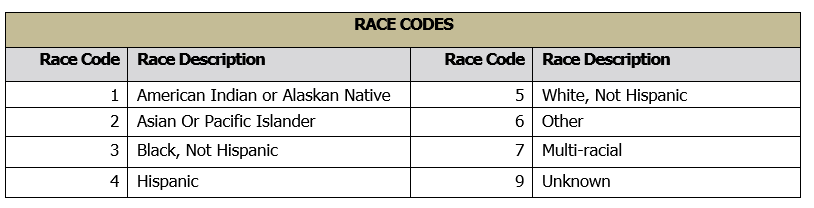

In [6]:
rmap = {1: 'aian',
        2: 'asian',
        3: 'nh_black',
        4: 'hispanic',
        5: 'nh_white',
        6: 'other',
        7: 'multi_racial',
        9: 'unknown'}

In [7]:
df['race'] = df.race.apply(lambda c: rmap[c])
df

,last_name,first_name,race
0,Walker,Elizabeth,nh_white
1,Palmer,Alton,nh_white
2,Mc Cleod,Alicia,nh_black
3,Scarborough,Dale,nh_white
4,Walker,Daniel,nh_white
5,Collier,Seth,nh_black
6,Martin,Robert,nh_white
7,Turner,Sharon,nh_black
8,Wood,Lilianna,hispanic
9,Planck,Barbara,nh_white


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.groupby(['race']).size()

race
aian              5532
asian            32964
hispanic        150627
multi_racial     12914
nh_black        220858
nh_white        791986
other            40999
unknown          22918
dtype: int64

In [10]:
sdf = df[df.race.isin(['asian', 'hispanic', 'nh_black', 'nh_white'])].sample(SAMPLE, random_state=21)
sdf

,last_name,first_name,race
862323,Jordan,Joseph,nh_black
623089,Harris,Earlene,nh_black
1261984,Watt,Cordel,nh_black
1165654,Truax,Timothy,nh_white
997727,Solivan Velazquez,Fredesvinda,hispanic
100393,Bailes,Rosa,nh_white
1134253,Ingram,Willie,nh_black
1485277,Innocent,Petrus,nh_black
910232,Charbonneau,Luisa,nh_white
17129,Bouwkamp,Kaitlin,nh_white


In [11]:
# Additional features
sdf['first_name'] = sdf.first_name.str.title()
sdf['last_name'] = sdf.last_name.str.title()

sdf.groupby('race').agg({'first_name': 'count'})

,first_name
race,
asian,27592
hispanic,125973
nh_black,184701
nh_white,661734


## Metaphone

In [12]:
sdf['first_name'] = sdf.first_name.apply(lambda c: doublemetaphone(c)[0])
sdf['last_name'] = sdf.last_name.apply(lambda c: doublemetaphone(c)[0])
sdf

,last_name,first_name,race
862323,JRTN,JSF,nh_black
623089,HRS,ARLN,nh_black
1261984,AT,KRTL,nh_black
1165654,TRKS,TM0,nh_white
997727,SLFNFLSKS,FRTSFNT,hispanic
100393,PLS,RS,nh_white
1134253,ANKRM,AL,nh_black
1485277,ANSNT,PTRS,nh_black
910232,XRPN,LS,nh_white
17129,PKMP,KTLN,nh_white


## Preprocessing the input data

In [13]:
# concat last name and first name
sdf['last_name_first_name'] = sdf['last_name'] + ' ' + sdf['first_name']

# build n-gram list
vect = CountVectorizer(analyzer='char', max_df=0.3, min_df=10, ngram_range=NGRAMS, lowercase=False) 
a = vect.fit_transform(sdf.last_name_first_name)
vocab = vect.vocabulary_

# sort n-gram by freq (highest -> lowest)
words = []
for b in vocab:
    c = vocab[b]
    #print(b, c, a[:, c].sum())
    words.append((a[:, c].sum(), b))
    #break
words = sorted(words, reverse=True)
words_list = [w[1] for w in words]
num_words = len(words_list)
print("num_words = %d" % num_words)

num_words = 2606


In [14]:
vocab

{'JR': 916,
 'RT': 2055,
 'TN': 2374,
 'N ': 1523,
 ' J': 53,
 'JS': 930,
 'SF': 2108,
 'JRT': 928,
 'RTN': 2064,
 'TN ': 2375,
 'N J': 1528,
 ' JS': 64,
 'JSF': 933,
 'HR': 765,
 'RS': 2041,
 'S ': 2083,
 ' A': 10,
 'AR': 438,
 'RL': 1968,
 'LN': 1251,
 'HRS': 777,
 'RS ': 2042,
 'S A': 2085,
 ' AR': 21,
 'ARL': 445,
 'RLN': 1977,
 'AT': 468,
 'T ': 2274,
 ' K': 67,
 'KR': 1092,
 'TL': 2345,
 'AT ': 469,
 'T K': 2280,
 ' KR': 77,
 'KRT': 1105,
 'RTL': 2062,
 'TR': 2403,
 'RK': 1953,
 'KS': 1107,
 ' T': 165,
 'TM': 2360,
 'M0': 1352,
 'TRK': 2409,
 'RKS': 1965,
 'KS ': 1108,
 'S T': 2096,
 ' TM': 172,
 'TM0': 2362,
 'SL': 2159,
 'LF': 1171,
 'FN': 576,
 'NF': 1547,
 'FL': 552,
 'LS': 1296,
 'SK': 2144,
 ' F': 25,
 'FR': 599,
 'TS': 2418,
 'NT': 1683,
 'SLF': 2162,
 'LFN': 1180,
 'FNF': 579,
 'NFL': 1552,
 'FLS': 564,
 'LSK': 1301,
 'SKS': 2156,
 'S F': 2086,
 ' FR': 35,
 'FRT': 612,
 'RTS': 2067,
 'TSF': 2421,
 'SFN': 2116,
 'FNT': 588,
 'PL': 1780,
 ' R': 137,
 'PLS': 1792,
 'LS ': 12

In [15]:
from itertools import chain

def n_grams(seq, n=1):
    """Returns an itirator over the n-grams given a listTokens"""
    shiftToken = lambda i: (el for j,el in enumerate(seq) if j>=i)
    shiftedTokens = (shiftToken(i) for i in range(n))
    tupleNGrams = zip(*shiftedTokens)
    return tupleNGrams # if join in generator : (" ".join(i) for i in tupleNGrams)

def range_ngrams(listTokens, ngramRange=(1,2)):
    """Returns an itirator over all n-grams for n in range(ngramRange) given a listTokens."""
    ngrams = (ngramRange[0], ngramRange[1] + 1)
    return chain(*(n_grams(listTokens, i) for i in range(*ngramRange)))

In [16]:
def find_ngrams(text, ngrams):
    a = range_ngrams(text, ngrams)
    wi = []
    for i in a:
        w = ''.join(i)
        try:
            idx = words_list.index(w)
        except:
            idx = 0
        wi.append(idx)
    return wi

# build X from index of n-gram sequence
X = np.array(sdf.last_name_first_name.apply(lambda c: find_ngrams(c, NGRAMS)))

# check max/avg feature
X_len = []
for x in X:
    X_len.append(len(x))

max_feature_len = max(X_len)
avg_feature_len = int(np.mean(X_len))

print("Max feature len = %d, Avg. feature len = %d" % (max_feature_len, avg_feature_len))
y = np.array(sdf.race.astype('category').cat.codes)

# Split train and test dataset
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

Max feature len = 19, Avg. feature len = 6


## Train a LSTM model

ref: http://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/

In [17]:
'''The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
Notes:

- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.

- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, Activation
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.models import load_model

max_features = num_words # 20000
feature_len = 25 # avg_feature_len # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=feature_len)
X_test = sequence.pad_sequences(X_test, maxlen=feature_len)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

num_classes = np.max(y_train) + 1
print(num_classes, 'classes')

print('Convert class vector to binary class matrix '
      '(for use with categorical_crossentropy)')
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

Using TensorFlow backend.


800000 train sequences
200000 test sequences
Pad sequences (samples x time)
X_train shape: (800000, 25)
X_test shape: (200000, 25)
4 classes
Convert class vector to binary class matrix (for use with categorical_crossentropy)
y_train shape: (800000, 4)
y_test shape: (200000, 4)


In [18]:
print('Build model...')

if False:
    model = Sequential()
    model.add(Embedding(num_words, 32, input_length=feature_len))
    model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(num_classes, activation='softmax'))
if True:
    embedding_vecor_length = 50
    model = Sequential()
    model.add(Embedding(num_words, embedding_vecor_length, input_length=feature_len))
    model.add(Conv1D(activation="relu", padding="same", filters=32, kernel_size=3))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(100))
    model.add(Dense(num_classes, activation='softmax'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

Build model...






_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 50)            130300    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 25, 32)            4832      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 12, 32)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 404       
Total params: 188,736
Trainable params: 188,736
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
print('Train...')
model.fit(X_train, y_train, batch_size=batch_size, epochs=EPOCHS,
          validation_split=0.1, verbose=1)
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size, verbose=1)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 720000 samples, validate on 80000 samples
Epoch 1/15





720000/720000 [==============================] - 476s 661us/step - loss: 0.7759 - acc: 0.7063 - val_loss: 0.7541 - val_acc: 0.7138
Epoch 2/15
720000/720000 [==============================] - 442s 614us/step - loss: 0.7262 - acc: 0.7259 - val_loss: 0.7208 - val_acc: 0.7281
Epoch 3/15
720000/720000 [==============================] - 454s 631us/step - loss: 0.7085 - acc: 0.7326 - val_loss: 0.7104 - val_acc: 0.7315
Epoch 4/15
720000/720000 [==============================] - 457s 635us/step - loss: 0.6963 - acc: 0.7370 - val_loss: 0.7040 - val_acc: 0.7334
Epoch 5/15
720000/720000 [==============================] - 457s 635us/step - loss: 0.6873 - acc: 0.7402 - val_loss: 0.7026 - val_acc: 0.7344
Epoch 6/15
720000/720000 [==============================] - 423s 587us/step - loss: 0.6809 - acc: 0.7427 - val_loss: 0.6983 - va

In [20]:
print('Test score:', score)
print('Test accuracy:', acc)

Test score: 0.6971138533592224
Test accuracy: 0.73735


## Confusion Matrix

In [21]:
y_pred = model.predict_classes(X_test, verbose=2)
p = model.predict_proba(X_test, verbose=2) # to predict probability
target_names = list(sdf.race.astype('category').cat.categories)
print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names))
print(confusion_matrix(np.argmax(y_test, axis=1), y_pred))

              precision    recall  f1-score   support

       asian       0.60      0.24      0.34      5518
    hispanic       0.65      0.44      0.53     25195
    nh_black       0.62      0.38      0.47     36940
    nh_white       0.77      0.91      0.83    132347

    accuracy                           0.74    200000
   macro avg       0.66      0.49      0.54    200000
weighted avg       0.72      0.74      0.71    200000

[[  1312    370    728   3108]
 [   108  11183   1350  12554]
 [   280   1276  13916  21468]
 [   504   4439   6345 121059]]


### Save model

In [22]:
#model.save('../models/fl_voter_soundnames_lstm.h5')
model.save('/opt/github/ethnicolr/ethnicolr/models/fl_voter_soundnames/fl_voter_soundnames_lstm.h5')

In [23]:
words_df = pd.DataFrame(words_list, columns=['vocab'])
#words_df.to_csv('../models/fl_voter_soundnames_vocab.csv', index=False, encoding='utf-8')
words_df.to_csv('/opt/github/ethnicolr/ethnicolr/models/fl_voter_soundnames/fl_voter_soundnames_vocab.csv', index=False, encoding='utf-8')